# 19 September 2023

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data=pd.read_csv("london_crime_by_lsoa.csv")
data.head(3)

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5


# Cek Missing Values

## Cek kolom yang mempunyai missing value

In [4]:
missing = data.isnull().sum()
missing

lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

## Hapus baris yang memiliki missing value

In [5]:
# Hapus data yang terdapat missing valuenya
data = data.dropna(subset=['major_category'])
data = data.dropna(subset=['minor_category'])
data = data.dropna(subset=['value'])
data = data.dropna(subset=['year'])
data = data.dropna(subset=['month'])


# Cek lagi missing value
missing = data.isnull().sum()
missing


lsoa_code         0
borough           0
major_category    0
minor_category    0
value             0
year              0
month             0
dtype: int64

# Cek Tipe Data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


# Bar Chart

## London's Total Crime Year by Year

In [7]:
data1= data.groupby("year").sum(numeric_only=True)
data1=data1["value"]

data1.head(2)

year
2008    738641
2009    717214
Name: value, dtype: int64

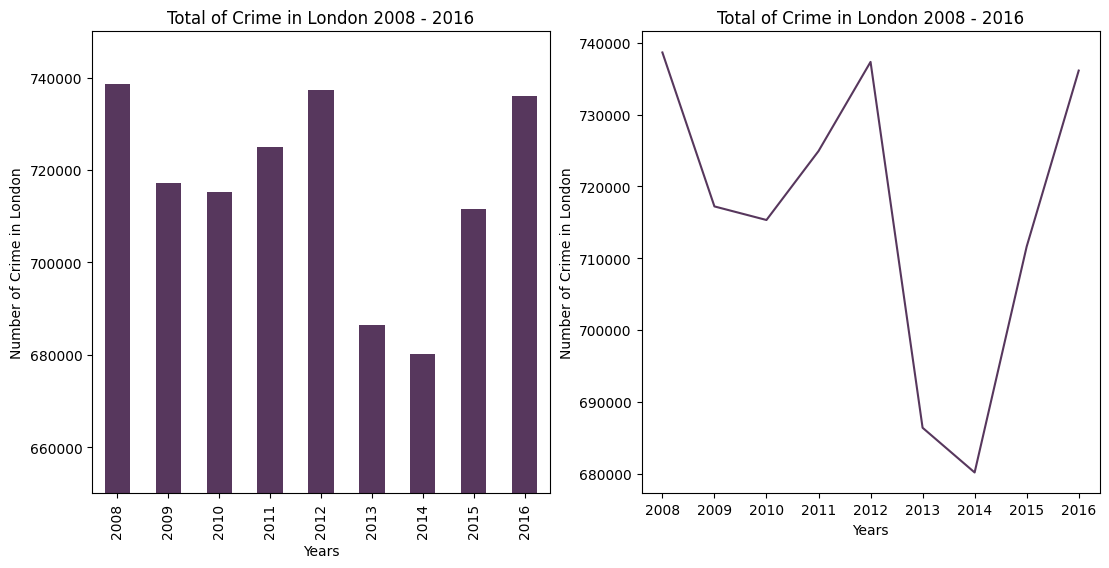

In [8]:
fig= plt.figure(figsize=(13, 6))  # membuat figure

ax1= fig.add_subplot(1,2,1)  # (row, column, loc plot)
ax2= fig.add_subplot(1,2,2)

data1.plot(kind="bar",color= "#57375D", ax=ax1 , width=0.5)
ax1.set_title('Total of Crime in London 2008 - 2016')
ax1.set_ylabel('Number of Crime in London')
ax1.set_xlabel('Years')
ax1.set_ylim(650000,750000)


data1.plot(kind="line",color= "#57375D", ax=ax2)
ax2.set_title('Total of Crime in London 2008 - 2016')
ax2.set_ylabel('Number of Crime in London')
ax2.set_xlabel('Years')

plt.show()

Grafik di atas menggambarkan bahwa tingkat kejahatan di London bergerak fluktuatif. Pola menunjukkan jika krisis mengakibatkan tingkat kejahatan meningkat seperti pada tahun 2011 dan 2015 ketika economic cricis dan living cost cricis terjadi.

# 2. Histogram

## UK's Crime Based on Category 2008 - 2016

In [9]:
# kolom Theft and Handling
ma1=data.loc[data["major_category"]=="Theft and Handling"]
ma1=ma1.groupby("year").sum()
ma1 = ma1["value"]

# kolom Violence Against the Person
ma2=data.loc[data["major_category"]=="Violence Against the Person"]
ma2=ma2.groupby("year").sum()
ma2 = ma2["value"]

# kolom Burglary
ma3=data.loc[data["major_category"]=="Burglary"]
ma3=ma3.groupby("year").sum()
ma3 = ma3["value"]

# kolom kriminal damage
ma4=data.loc[data["major_category"]=="Criminal Damage"]
ma4=ma4.groupby("year").sum()
ma4 = ma4["value"]

# kolom drugs
ma5=data.loc[data["major_category"]=="Drugs"]
ma5=ma5.groupby("year").sum()
ma5 = ma5["value"]

# kolom lain-lain
ex = ["Theft and Handling","Violence Against the Person","Burglary", "Criminal Damage", "Drugs"]
others=[x for x in data["major_category"] if x!= ex]
ma6= data.loc[data["major_category"]==others]
ma6=ma6.groupby("year").sum()
ma6=ma6["value"]
ma6.head(3)

C:\Users\novir\AppData\Local\Temp\ipykernel_17252\1418621619.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ma1=ma1.groupby("year").sum()
C:\Users\novir\AppData\Local\Temp\ipykernel_17252\1418621619.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ma2=ma2.groupby("year").sum()
C:\Users\novir\AppData\Local\Temp\ipykernel_17252\1418621619.py:13: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  ma3=ma3.groupby("year").

year
2008    738641
2009    717214
2010    715324
Name: value, dtype: int64

In [10]:
# Gabungkan ke dalam 1 dataframe
data_baru1 =pd.merge(ma1,ma2, on="year", how="left")
data_baru2= pd.merge(ma3,ma4, on="year", how="left")
data_baru3= pd.merge(ma5,ma6, on="year", how="left")
data_baru4= pd.merge(data_baru2,data_baru1, on= "year", how="left")
data_baru= pd.merge(data_baru4,data_baru3, on= "year", how="left")

data_baru.head(2)

,value_x_x,value_y_x,value_x_y,value_y_y,value_x,value_y
year,,,,,,
2008,88092,91872,283692,159844,68804,738641
2009,90619,85565,279492,160777,60549,717214


In [11]:
# Rename nama kolom
ex = ["Theft and Handling","Violence Against the Person","Burglary"]
data_baru.rename(columns={u"value_x_x": u"Theft and Handling", u"value_y_x":u"Violence Against the Person", u"value_x_y":u"Burglary", u"value_y_y":u"Criminal Damage", u"value_x" : u"Drugs", u"value_y": "Others"}, inplace=True)

data_baru.head(2)

,Theft and Handling,Violence Against the Person,Burglary,Criminal Damage,Drugs,Others
year,,,,,,
2008,88092,91872,283692,159844,68804,738641
2009,90619,85565,279492,160777,60549,717214


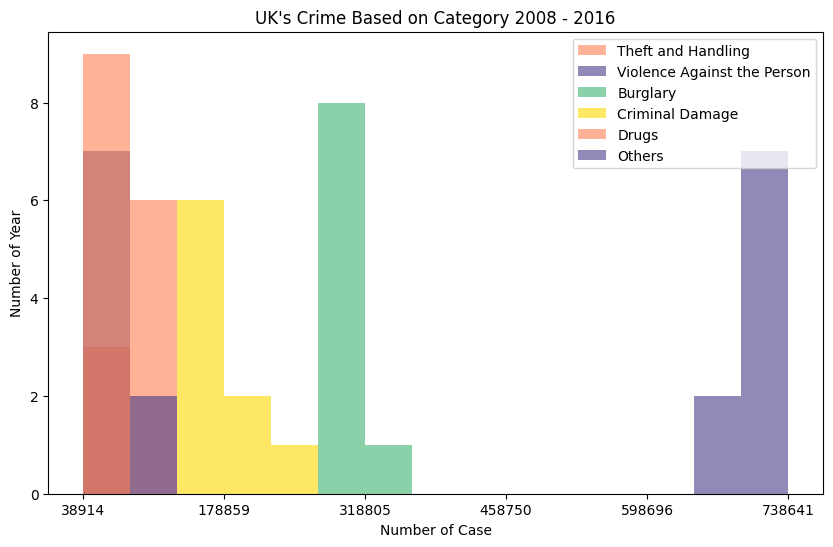

In [12]:

count, bin_edges = np.histogram(data_baru, 5)

data_baru.plot(kind='hist',
         figsize=(10,6),
         bins=15,
         alpha=0.6,
         xticks= bin_edges,
         color=['coral', 'darkslateblue', 'mediumseagreen', 'gold'])

plt.title("UK's Crime Based on Category 2008 - 2016")
plt.ylabel('Number of Year')
plt.xlabel('Number of Case')

plt.show()

# 3. Plot Area

## Monthly Criminal Case in London 2008-2016

In [13]:
# Membuat data terlebih dahulu
t8 = data[data["year"] == 2008]
t8= t8.groupby("month").sum()
t8=pd.DataFrame(t8["value"])

t9 = data[data["year"] == 2009]
t9= t9.groupby("month").sum()
t9=pd.DataFrame(t9["value"])

t10 = data[data["year"] == 2010]
t10= t10.groupby("month").sum()
t10=pd.DataFrame(t10["value"])

t11 = data[data["year"] == 2011]
t11= t11.groupby("month").sum()
t11=pd.DataFrame(t11["value"])

t12 = data[data["year"] == 2012]
t12= t12.groupby("month").sum()
t12=pd.DataFrame(t12["value"])

t13 = data[data["year"] == 2013]
t13= t13.groupby("month").sum()
t13=pd.DataFrame(t13["value"])

t14 = data[data["year"] == 2014]
t14= t14.groupby("month").sum()
t14=pd.DataFrame(t14["value"])

t15 = data[data["year"] == 2015]
t15= t15.groupby("month").sum()
t15=pd.DataFrame(t15["value"])

t16 = data[data["year"] == 2016]
t16= t16.groupby("month").sum()
t16=pd.DataFrame(t16["value"])

merge1=pd.merge(t8,t9, on="month", how='left')
merge2=pd.merge(t10,t11, on="month", how='left')
merge3=pd.merge(t12,t13, on="month", how='left')
merge4=pd.merge(t14,t15, on="month", how='left')

merge5=pd.merge(merge1,merge2, on="month", how='left')
merge6=pd.merge(merge3,merge4, on="month", how='left')

merge6=pd.merge(merge5,merge6, on="month", how='left')

merge7=pd.merge(merge6,t16, on="month", how='left')

merge7

C:\Users\novir\AppData\Local\Temp\ipykernel_17252\1177693072.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t8= t8.groupby("month").sum()
C:\Users\novir\AppData\Local\Temp\ipykernel_17252\1177693072.py:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t9= t9.groupby("month").sum()
C:\Users\novir\AppData\Local\Temp\ipykernel_17252\1177693072.py:11: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  t10= t10.groupby("month"

,value_x_x_x,value_y_x_x,value_x_y_x,value_y_y_x,value_x_x_y,value_y_x_y,value_x_y_y,value_y_y_y,value
month,,,,,,,,,
1,65419,59142,54934,57966,62436,58933,55515,57055,58847
2,62626,54706,55069,54895,56735,55271,51222,53316,56697
3,61343,63482,63629,61282,67537,57590,57669,60096,59167
4,59640,59181,60085,58714,58801,55678,53467,56445,58637
5,62587,62897,62126,62630,64344,56765,56327,61038,63990
6,62290,63116,62632,61822,62281,56839,57039,60760,62262
7,64126,63281,63764,62428,63280,60508,58564,61606,65519
8,59959,58695,59040,59117,62143,57467,55641,58056,62666
9,58414,57847,59731,58640,56912,54924,56933,57564,61412


In [14]:
# Rename nama kolom

merge7.rename(columns={u"value_x_x_x" : u"2008", u"value_y_x_x":u"2009",u"value_x_y_x":u"2010", u"value_y_y_x":u"2011",u"value_x_x_y":u"2012",u"value_y_x_y":u"2013",u"value_x_y_y":u"2014",u"value_y_y_y":u"2015",u"value":u"2016"}, inplace= True)

merge7.head(2)

,2008,2009,2010,2011,2012,2013,2014,2015,2016
month,,,,,,,,,
1,65419,59142,54934,57966,62436,58933,55515,57055,58847
2,62626,54706,55069,54895,56735,55271,51222,53316,56697


In [15]:
bulan= list(range(1,13,1))
merge7=merge7.assign(month= list(range(1,13,1)))
merge7.head(2)

,2008,2009,2010,2011,2012,2013,2014,2015,2016,month
month,,,,,,,,,,
1,65419,59142,54934,57966,62436,58933,55515,57055,58847,1
2,62626,54706,55069,54895,56735,55271,51222,53316,56697,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


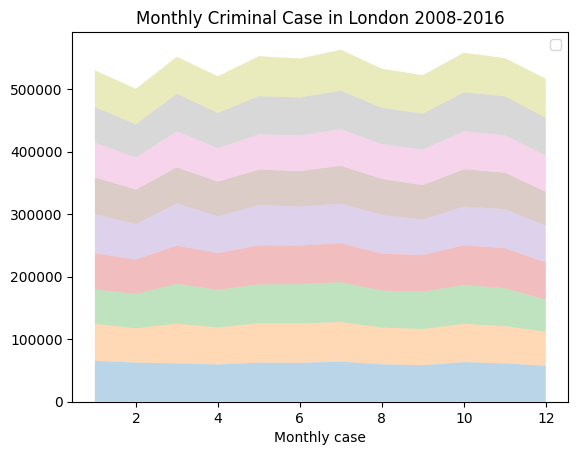

In [16]:
# Mulai visualisasikan

plt.stackplot(merge7["month"], merge7["2008"], merge7["2009"],merge7["2010"],merge7["2011"],merge7["2012"],merge7["2013"],merge7["2014"],merge7["2015"],merge7["2016"], alpha=0.3)


plt.title("Monthly Criminal Case in London 2008-2016")
plt.xlabel("Month")
plt.xlabel("Monthly case")

plt.legend(loc=1, ncol=4)

plt.show()

Tindak kejahatan cenderung meningkat pada bulan Maret, Mei, Oktober, dan November.

# 4. Pie Chart

## Percentage of Criminal Case Based on Major Category

In [18]:
data4= data.groupby("major_category").sum().sort_values(by="value",ascending=False)
data4 =data4["value"].transpose()

data4.head(2)

C:\Users\novir\AppData\Local\Temp\ipykernel_17252\1544670546.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data4= data.groupby("major_category").sum().sort_values(by="value",ascending=False)


major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Name: value, dtype: int64

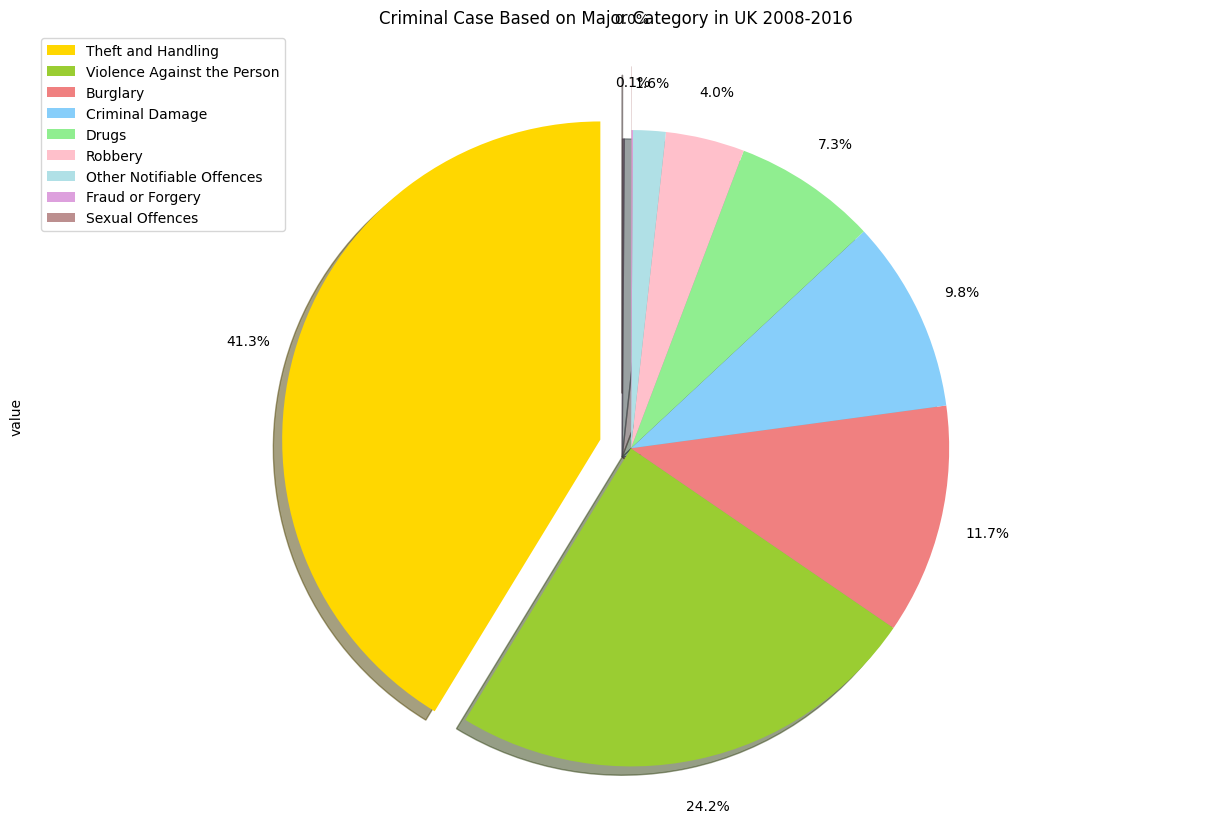

In [19]:
color_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink','powderblue', 'plum', 'rosybrown']
explode_list = [0.1, 0,0,0, 0, 0,0,0, 0.2]

data4.plot(kind='pie',
          figsize=(15,10),
          autopct='%1.1f%%',
          startangle=90,
           labels= None,
          shadow=True,
          pctdistance=1.15,
          colors=color_list,
          explode=explode_list)

plt.title('Criminal Case Based on Major Category in UK 2008-2016')
plt.axis('equal')

plt.legend(labels=data4.index, loc='upper left')

plt.show()

Hampir 50% kejahatan yang terjadi di UK masuk dalam kategori Theft and Handling. Selain itu, kategori Violence Againts the Person dan Burglary juga menyumbang lebih dari 10% jumlah kejahatan di UK selama 2008 - 2016. 

In [20]:
# Top 5 Criminal Case

data4.head(5)

major_category
Theft and Handling             2661861
Violence Against the Person    1558081
Burglary                        754293
Criminal Damage                 630938
Drugs                           470765
Name: value, dtype: int64

# 5. Box Plot

## London's Crime in 2011 and 2015

In [21]:
data6= t11.copy()
data7= t15.copy()
data8=pd.merge(data6,data7, on="month", how='left')

data8.head(2)

,value_x,value_y
month,,
1,57966,57055
2,54895,53316


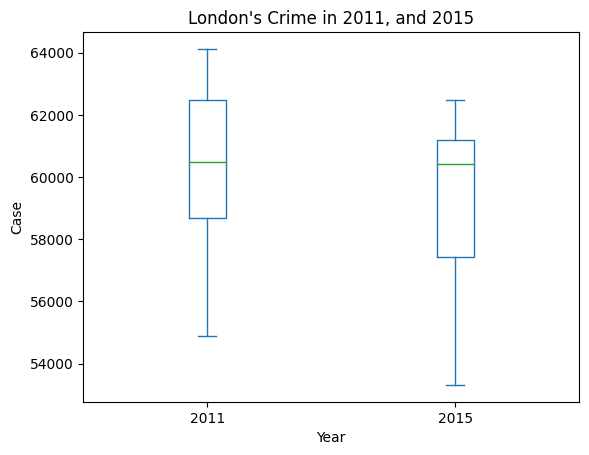

In [22]:
data8.rename(columns={u"value_x" : u"2011",u"value_y" : u"2015"}, inplace=True)

data8.plot(kind='box')

plt.ylabel("Case")
plt.xlabel("Year")
plt.title("London's Crime in 2011, and 2015")

plt.show()

Median data dari tahun 2011 dan 2015 mempunyai nilai dengan kisaran yang sama. Namun, jumlah kejahatan yang terjadi pada tahun 2015 mayoritas di bawah 60.000 kasus pada tiap bulannya. Sedangkan pada tahun 2011, 50% kasus kriminal yang terjadi di tiap bulannya berkisar 60.000 kasus dan 50% sisanya di atas 60.000 kasus/bln.

In [23]:
data8.describe()

,2011,2015
count,12.000000,12.000000
mean,60409.583333,59302.000000
std,2704.052530,2805.226875
min,54895.000000,53316.000000
25%,58695.500000,57436.750000
50%,60481.000000,60428.000000
75%,62478.500000,61180.000000
max,64119.000000,62487.000000


# 6. Scatter Plot

## Monthly London Criminal Case in 2011 and 2015

In [24]:
data8=data8.assign(month= list(range(1,13,1)))
data8.head(2)

,2011,2015,month
month,,,
1,57966,57055,1
2,54895,53316,2


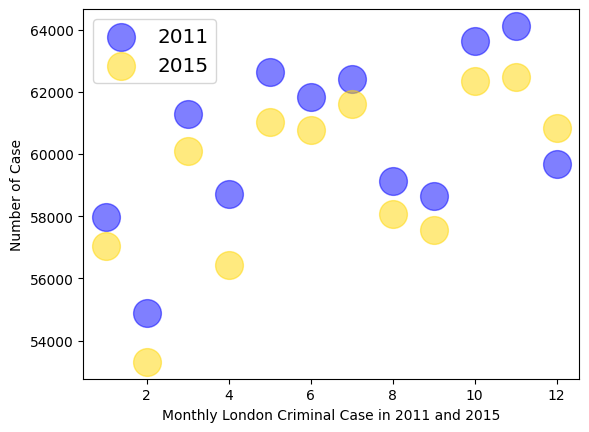

In [25]:
# 2011
ax1 = data8.plot(kind='scatter',
                    x="month",
                    y="2011",
                    alpha=.5,
                    color='blue',
                 s= 400)
# 2015
ax2 = data8.plot(kind='scatter',
                    x="month",
                    y="2015",
                    alpha=.5,
                    color='gold',
                    ax = ax1,
                 s= 400)

ax1.set_ylabel('Number of Case')
ax1.set_xlabel('Monthly London Criminal Case in 2011 and 2015')
ax1.legend(['2011', '2015'], loc='upper left', fontsize='x-large')

Dari grafik scatter di atas, juga mendeskripsikan bahwa jumlah kasus kriminal tahun 2011 lebih tinggi daripada tahun 2015 untuk tiap-tiap bulannya.

# Word Clouds

In [26]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

In [27]:
data9= data.groupby(['borough']).sum()
data9 =data9['value']
data9=data9.to_frame()
data9.reset_index(inplace=True)
data9.head(2)

C:\Users\novir\AppData\Local\Temp\ipykernel_17252\638115947.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data9= data.groupby(['borough']).sum()


,borough,value
0,Barking and Dagenham,149447
1,Barnet,212191


In [28]:
data9['borough']= data9['borough'] + ' '


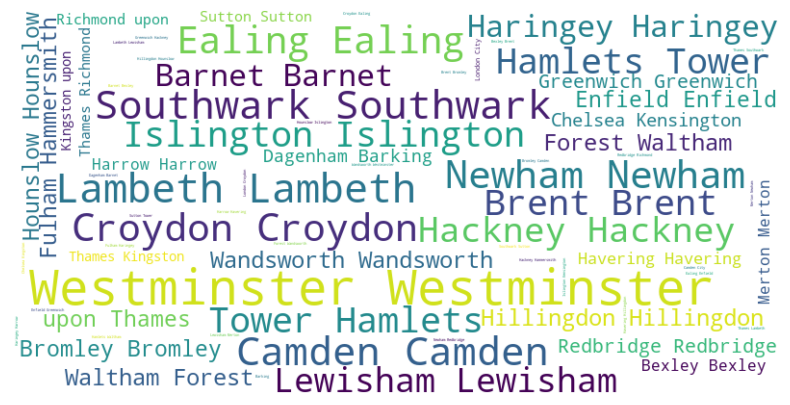

In [29]:
# Start with one review:
data9['Hasil']= (data9['borough']*data9['value'])


wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(data9['Hasil']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Hilangkan sumbu
plt.show()


sintaks Python yang menggabungkan semua elemen dalam kolom 'borough' dari DataFrame data9 menjadi satu string dengan spasi sebagai pemisah..

In [30]:
data9.sort_values(by='value', ascending=False).head(5)

,borough,value,Hasil
32,Westminster,455028,Westminster Westminster Westminster Westminste...
21,Lambeth,292178,Lambeth Lambeth Lambeth Lambeth Lambeth Lambet...
27,Southwark,278809,Southwark Southwark Southwark Southwark Southw...
5,Camden,275147,Camden Camden Camden Camden Camden Camden Camd...
24,Newham,262024,Newham Newham Newham Newham Newham Newham Newh...
